# README

Flywing Projection experiment 

`train_data`: 
	the corresponding low and high pairs of image patches (in python/numpy npz file format)

`test_data`: 
	the test stacks used for the analysis, 3 low conditions (C0,C1,C3) and a GT condition (C2). Addtionally, the projections via PreMosa [1] are provided ("proj_" prefix).


[1] Blasse et al. "PreMosa: extracting 2D surfaces from 3D microscopy mosaics." Bioinformatics 2017.

In [1]:
import numpy as np
from csbdeep.utils.plot_utils import plot_some
from matplotlib import pyplot as plt
import tifffile as tif

In [2]:
def npadrr_info(adrr: np.ndarray) -> None:
    print(f'shape: {adrr.shape}')
    print(f'dtype: {adrr.dtype}')

# 1. Train Data

In [3]:
train_path = './train_data/data_label.npz'
train_file = np.load(train_path)
print(train_file.files)

['X', 'Y']


### 1.1. 3D Image Stack
- 数量: 17780
- 通道: 50(Z轴)
- 尺寸：64(X轴) x 64(Y轴)

In [4]:
train_lr = train_file['X']
npadrr_info(train_lr)

shape: (17780, 1, 50, 64, 64)
dtype: float32


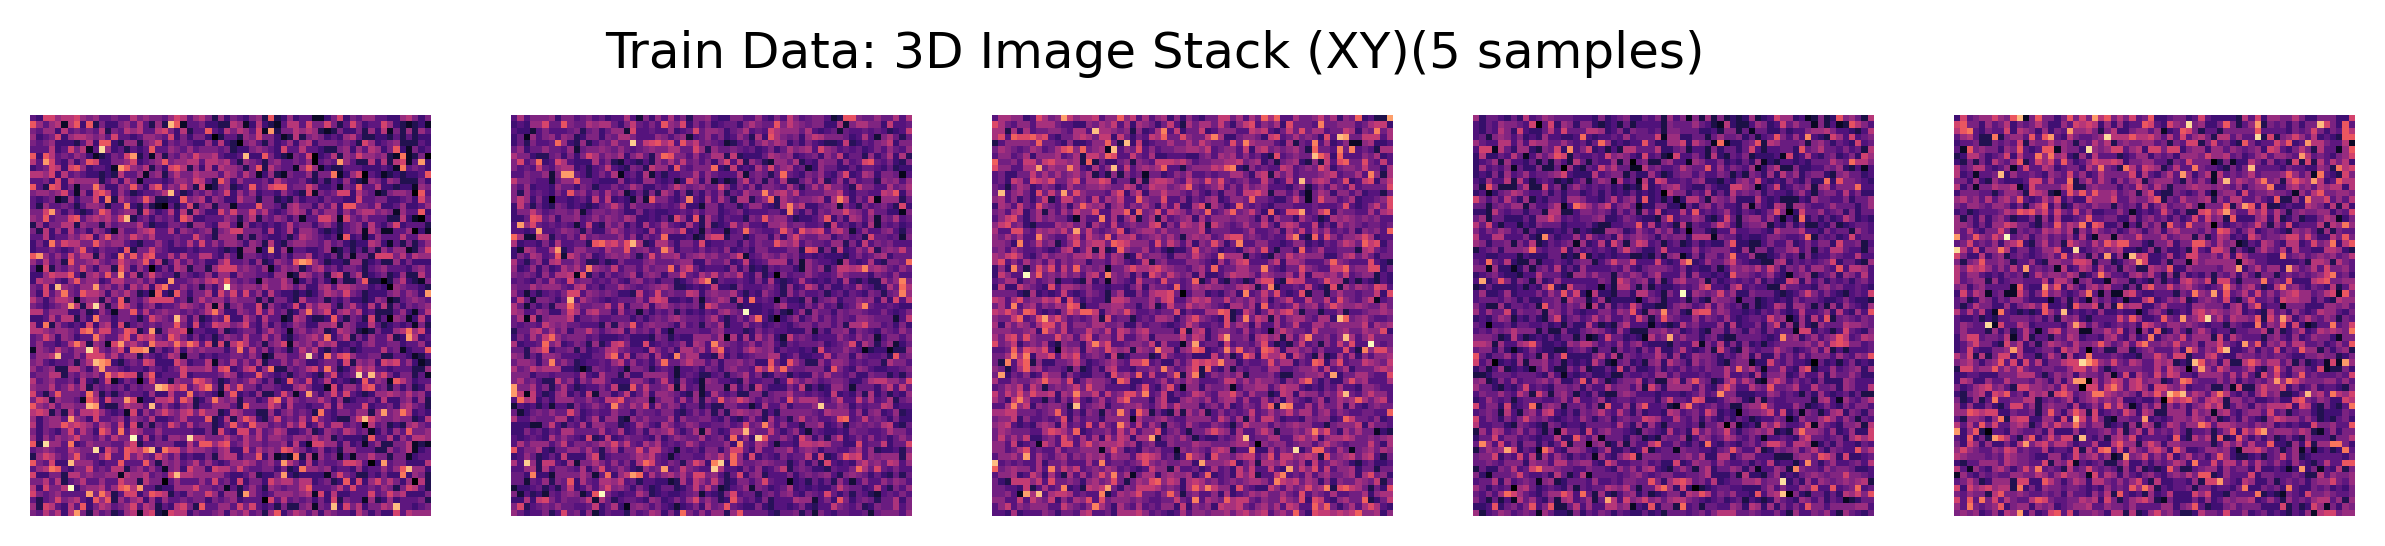

In [5]:
plt.figure(figsize=(10,2), dpi=300)
plt.suptitle('Train Data: 3D Image Stack (XY)(5 samples)')
plot_some(train_lr[0:5])
plt.show()

### 1.2. Projection Image (GT)
- 数量: 17780
- 通道: 1
- 尺寸：64(X轴) x 64(Y轴)

In [6]:
train_hr = train_file['Y']
npadrr_info(train_hr)

shape: (17780, 1, 64, 64)
dtype: float32


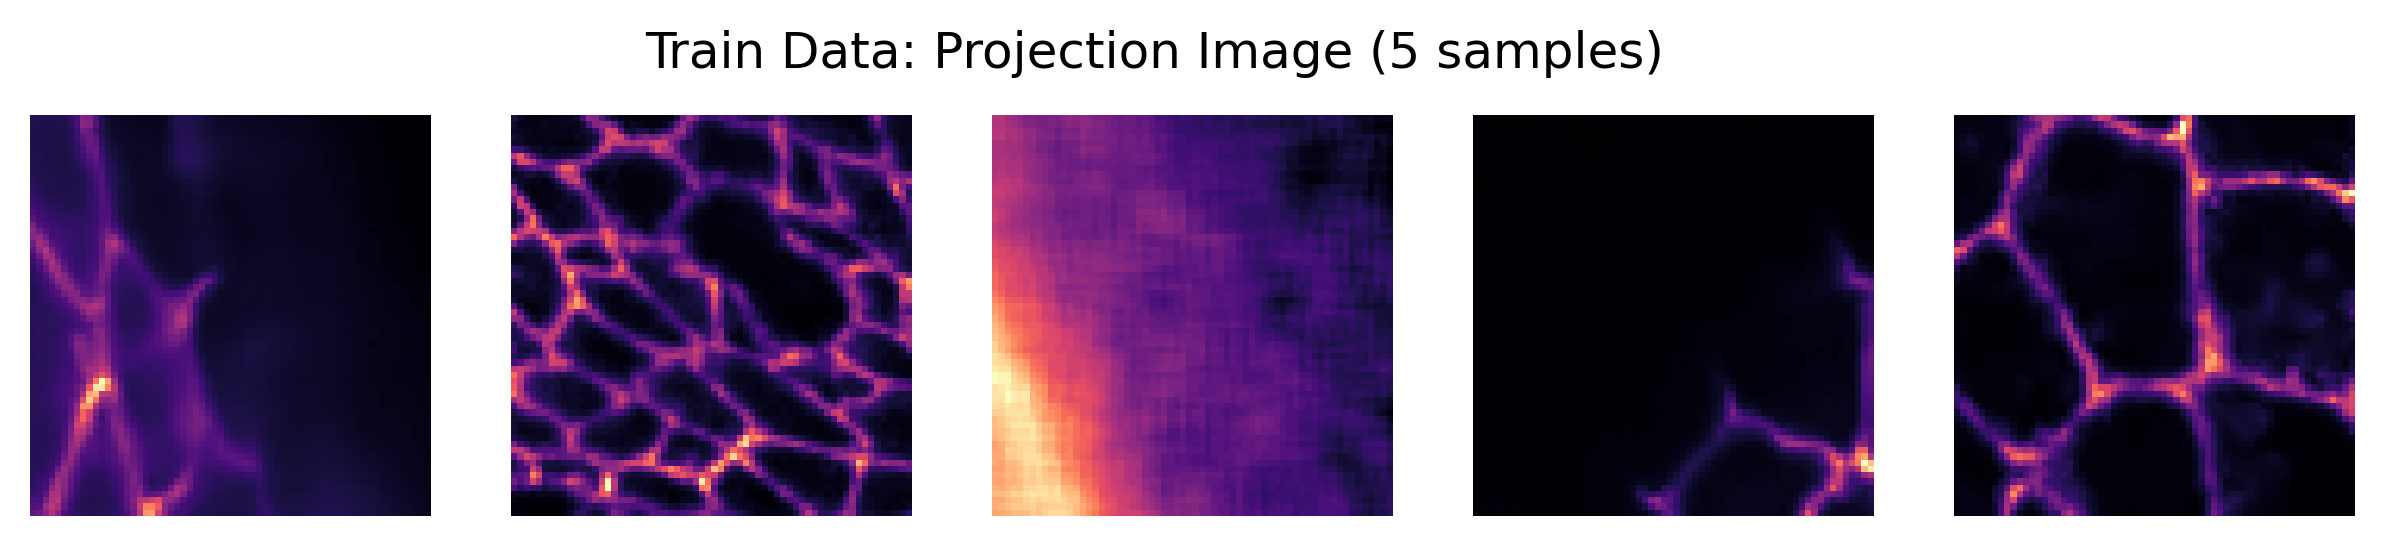

In [7]:
plt.figure(figsize=(10,2), dpi=300)
plt.suptitle('Train Data: Projection Image (5 samples)')
plot_some(train_hr[0:5])
plt.show()

# 2. Test Set

### 2.1. 3D Image Stack
- 数量: 3（C0、C1、C3 is low condition & C2 is Ground Truth）
- 通道: 50
- 尺寸: 692x520

In [8]:
test_3d_path = ['./test_data/C0_T001.tif',
                './test_data/C1_T001.tif',
                './test_data/C2_T001.tif',
                './test_data/C3_T001.tif']
test_lr = np.asarray([tif.imread(test_3d_path[i]) for i in range(4)])
npadrr_info(test_lr)

shape: (4, 50, 520, 692)
dtype: uint16


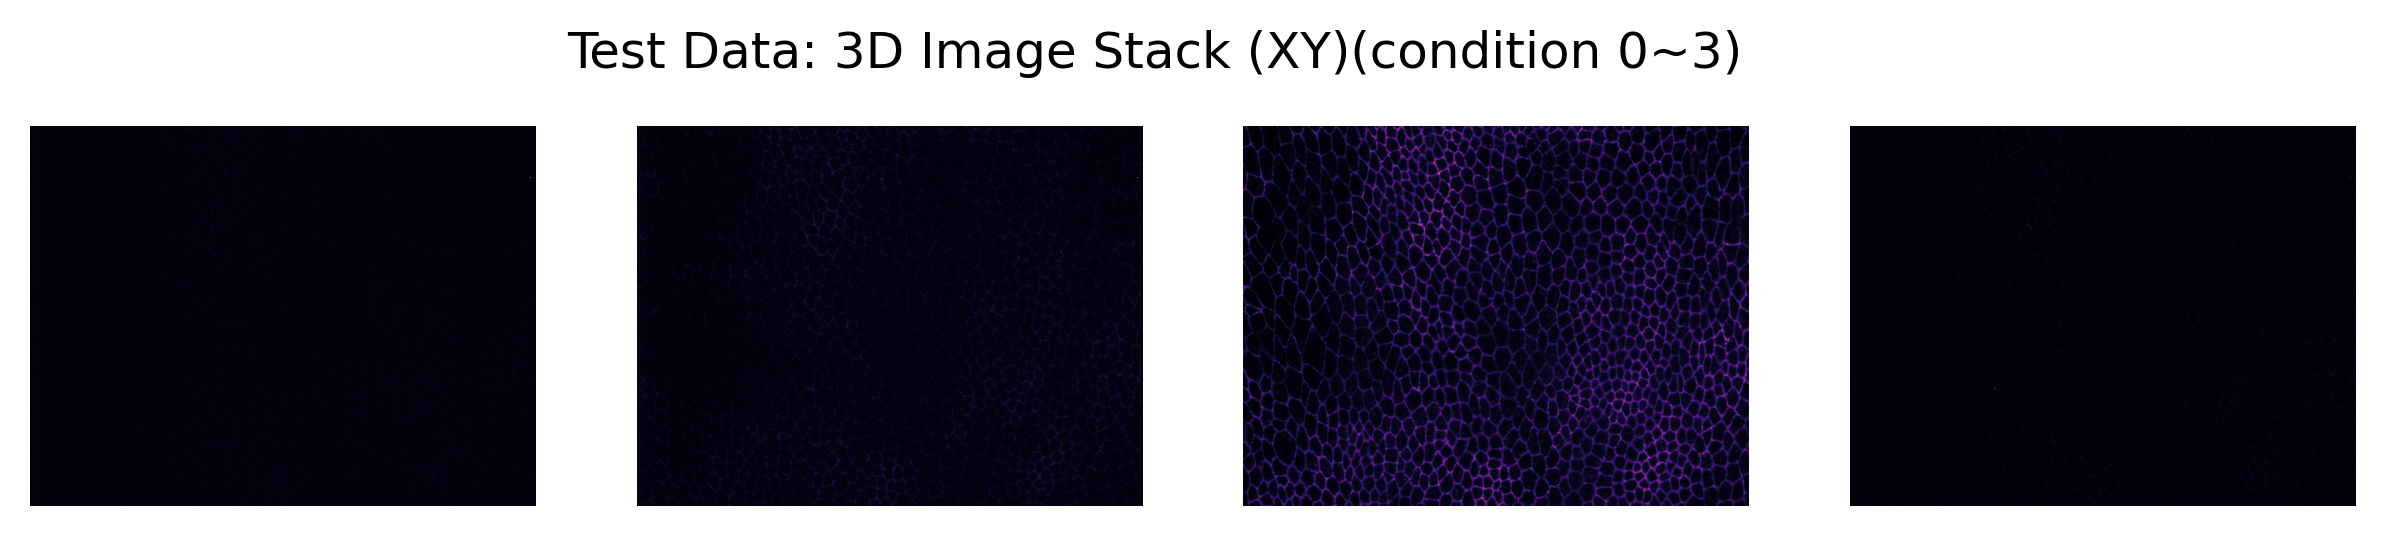

In [9]:
plt.figure(figsize=(10,2), dpi=300)
plt.suptitle(f'Test Data: 3D Image Stack (XY)(condition 0~3)')
plot_some(test_lr)
plt.show()

### 2.2. Projection Image
- 数量: 4
- 通道: 1
- 尺寸: 692x520

In [10]:
test_proj_path = ['./test_data/proj_C0_T001.tif',
                  './test_data/proj_C1_T001.tif',
                  './test_data/proj_C2_T001.tif',
                  './test_data/proj_C3_T001.tif']
test_hr = np.asarray([tif.imread(test_proj_path[i]) for i in range(4)])
npadrr_info(test_hr)

shape: (4, 520, 692)
dtype: uint16


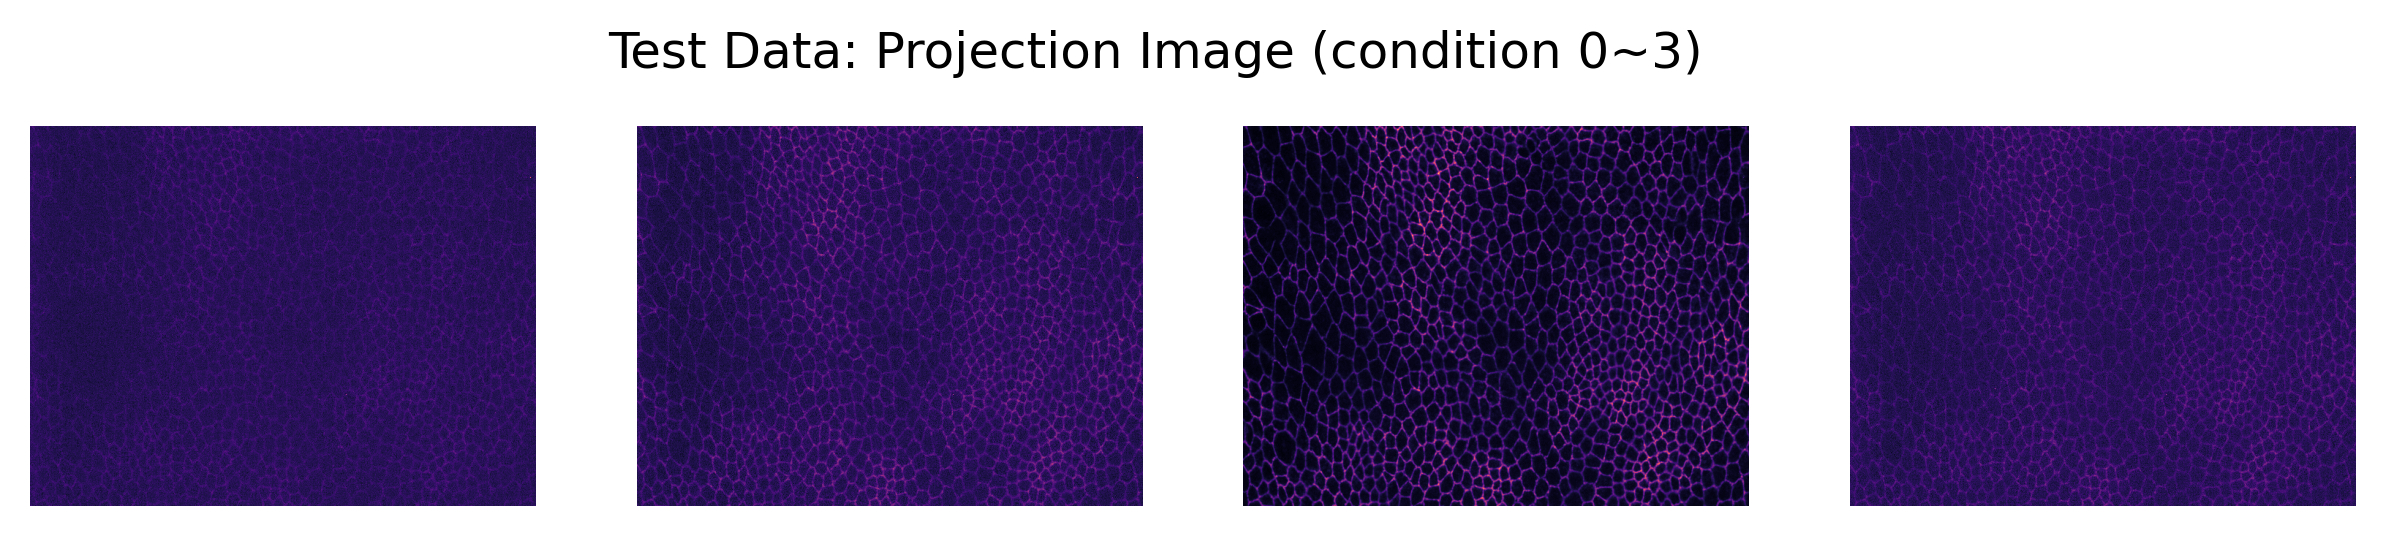

In [11]:
plt.figure(figsize=(10,2), dpi=300)
plt.suptitle('Test Data: Projection Image (condition 0~3)')
plot_some(test_hr)
plt.show()